In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
class TimedFile:
    def __init__(self, time: float, name: str):
        self.time = time
        self.name = name
        
def get_timed_text_files(dir: str) -> list[str]:
    timed_files = []
    for filename in os.listdir(dir):
        if filename.endswith("txt"):
            time       = os.path.getmtime(filename)
            timed_file = TimedFile(time, filename)
            timed_files.append(timed_file)
    return timed_files

def get_latest_text_filename(timed_files: list[TimedFile]) -> str:
    timed_files.sort(key=lambda item: item.time, reverse=True)
    last_modified_timed_file = timed_files[0]
    return last_modified_timed_file.name

def get_temp_mag(latest_file: str, separator: str) -> tuple[list, list]:
    temps = []
    mags  = []
    with open(latest_file, "r") as f:
        for lines in f.readlines():
            temp_vs_mag = lines.split(separator)
            temps.append(float(temp_vs_mag[0]))
            mags.append(float(temp_vs_mag[1]))
    return (temps, mags)

In [ ]:
text_files  = get_timed_text_files(os.getcwd())
latest_file = get_latest_text_filename(text_files)

keyword = "magnetization"
if latest_file.find(keyword) != -1:
    print(f"Last file with word \"{keyword}\" is \"{latest_file}\"")
    (temps, mags) = get_temp_mag(latest_file, ", ")
    if len(temps) and len(mags):
        print("Values loaded!")
    else:
        print("Error loading values, check the separator maybe?")
else:
    print(f"found {latest_file}")
    print(f"but it doesn't contains \"{keyword}\", maybe it is not the right one!")


Last file with magnetization is "magnetization_10x10_temp_1.00_to_3.00.txt"
Values loaded!


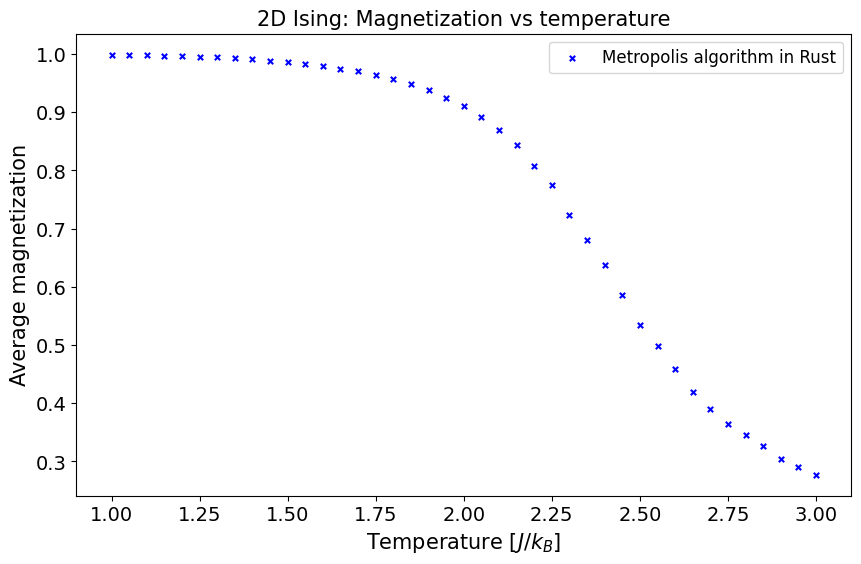

In [77]:
plt.figure(figsize=(10,6))
plt.title("2D Ising: Magnetization vs temperature", fontsize=15)
plt.scatter(temps, mags, s=15, c='b', marker='x', label="Metropolis algorithm in Rust")
plt.xlabel("Temperature $[J/k_B]$", fontsize=15)
plt.ylabel("Average magnetization", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
img_file = latest_file.removesuffix("txt")
plt.savefig(img_file + "jpg")
plt.show()
